In [1]:
import numpy as np
import pandas as pd 

testing_letter = pd.read_csv('./emnist_encoded_test.csv')
training_letter = pd.read_csv('./emnist_encoded_train.csv')


Arbi found the dataset, analysed it.
I performed one-hot encoding, normalisation of the data.
Algorithm is jointly developed and is yet to be improved. (in terms of accuracy)

In [2]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 810)
(14799, 803)


In [2]:
training_letter.head()

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#training_letters
y1 = np.array(training_letter.iloc[:,:26].values) ## The first 26 columns correspond one-hot-encoded to labels
x1 = np.array(training_letter.iloc[:,26:].values) ## All the other columns correspond to pixel values for each 28x28 image , to know the amount of images  
#testing_letters                          ## in front of each label, we have 784 values in a row, which correspond to pixels in a single image of that label
y2 = np.array(testing_letter.iloc[:,:19].values)  ## LABELS 
x2 = np.array(testing_letter.iloc[:,19:].values)

print(y1.shape)
print(x1.shape)

(88799, 26)
(88799, 784)


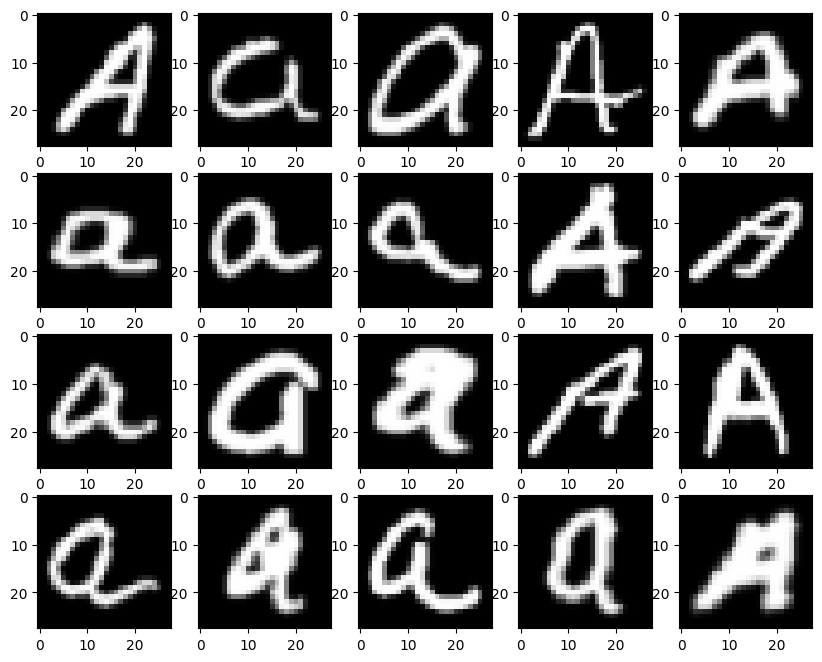

In [31]:
import matplotlib.pyplot as plt 
from scipy.ndimage import rotate

fig,axes = plt.subplots(4,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ### We think images should be rotated 
    ax.imshow(rotate(np.fliplr(np.array(x2[i]).reshape(28, 28)), 90), cmap='gray')

Normalisation of data and reshaping 

In [33]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)
print(train_images.shape)


test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)
print(test_images.shape)

(88799, 28, 28, 1)
(14799, 28, 28, 1)


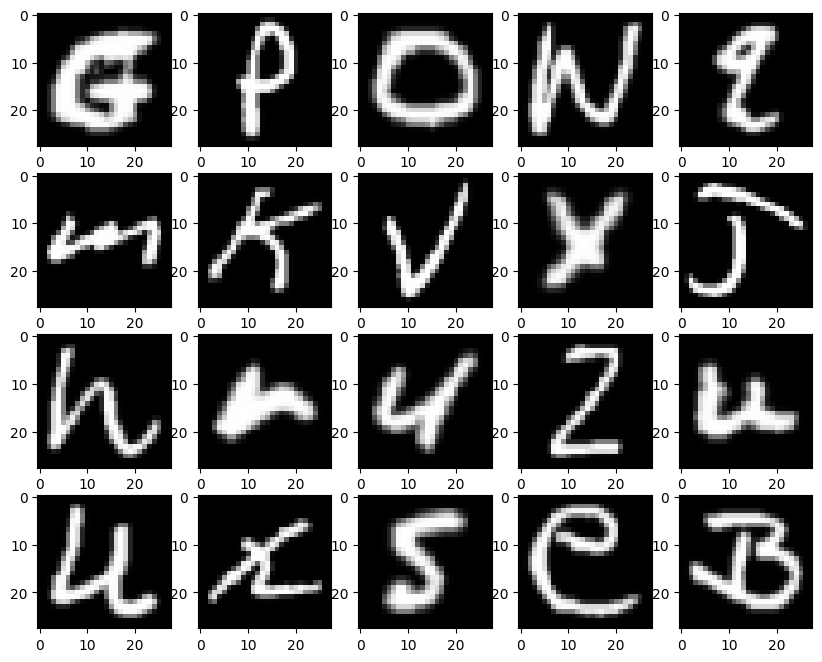

In [34]:
fig,axes = plt.subplots(4,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
                                ### reshaping a (1,784) vector into 28x28 matrix
    ax.imshow(rotate(np.fliplr(np.array(train_images[i]).reshape(28, 28)), 90), cmap='gray')

In [37]:
train_labels = y1
test_labels = y2

train_labels.shape

(88799, 26)

In [11]:

from tqdm import tqdm
label_count = 26
pixels = 28 * 28

input_size = pixels
hidden1_size = 128
hidden2_size = 64

hidden3_size = 32

output_size = 26

### WEIGHTS FOR EACH LAYER
w_i_h1 = np.random.uniform(-0.5, 0.5, (hidden1_size, input_size))
w_h1_h2 = np.random.uniform(-0.5, 0.5, (hidden2_size, hidden1_size))
w_h2_o = np.random.uniform(-0.5, 0.5, (output_size, hidden2_size))

### BIASES OF EACH LAYER
b_i_h1 = np.zeros((hidden1_size, 1))
b_h1_h2 = np.zeros((hidden2_size, 1))
b_h2_o = np.zeros((output_size, 1))
### 

print(w_i_h1.shape)

learn_rate = 0.01
nr_correct = 0
epochs = 100

cur_step = 0
for epoch in range(epochs):
    for img, l in tqdm(zip(train_images, train_labels)):
        #img = np.reshape(img, (len(img), 1))
        #l = np.reshape(l, (len(l), 1))
        
        img = img.reshape(-1, 1)  # Reshape img to a column vector
        l = l.reshape(-1, 1)      ## reshape labels to a column vector

        # Forward propagation
        h1_pre = b_i_h1 + w_i_h1.dot(img)
        h1 = np.maximum(0, h1_pre)    ## sigmoid activ.
        
        h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
        h2 = np.maximum(0, h2_pre)   ## sigmoid activation 
    
        o_pre = b_h2_o + w_h2_o.dot(h2)
        o = 1 / (1 + np.exp(-o_pre))     ## sigmoid activ.  maybe ReLU activation would be better?

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))
        ## 
        # Backpropagation
        partial_o = o - l                               ### Sigmoid deriv.
        delta_h2 = np.transpose(w_h2_o).dot(partial_o) * (h2 > 0)
                                                        ## Sigmoid deriv. 
        delta_h1 = np.transpose(w_h1_h2).dot(delta_h2) * (h1 > 0)
        
        w_h2_o += -learn_rate * partial_o.dot(np.transpose(h2))
        b_h2_o += -learn_rate * partial_o
        
        w_h1_h2 += -learn_rate * delta_h2.dot(np.transpose(h1))
        b_h1_h2 += -learn_rate * delta_h2
        
        w_i_h1 += -learn_rate * delta_h1.dot(np.transpose(img))
        b_i_h1 += -learn_rate * delta_h1

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / train_images.shape[0]) * 100, 2)}%")
    nr_correct = 0


(128, 784)


88799it [00:47, 1868.91it/s]


Acc: 70.35%


88799it [00:40, 2181.59it/s]


Acc: 81.2%


88799it [00:40, 2167.88it/s]


Acc: 83.88%


88799it [00:41, 2156.43it/s]


Acc: 85.34%


88799it [00:41, 2164.56it/s]


Acc: 86.43%


88799it [00:40, 2170.43it/s]


Acc: 87.21%


88799it [00:41, 2155.69it/s]


Acc: 87.68%


88799it [00:41, 2150.05it/s]


Acc: 88.19%


88799it [00:41, 2147.12it/s]


Acc: 88.69%


88799it [00:41, 2160.01it/s]


Acc: 88.97%


88799it [00:41, 2160.57it/s]


Acc: 89.3%


88799it [00:45, 1943.49it/s]


Acc: 89.46%


88799it [00:40, 2187.96it/s]


Acc: 89.57%


88799it [00:43, 2027.62it/s]


Acc: 89.87%


88799it [00:40, 2219.76it/s]


Acc: 90.1%


88799it [00:40, 2190.63it/s]


Acc: 90.24%


88799it [00:40, 2204.48it/s]


Acc: 90.48%


88799it [00:40, 2194.88it/s]


Acc: 90.28%


88799it [00:40, 2198.15it/s]


Acc: 90.58%


88799it [00:40, 2200.99it/s]


Acc: 90.63%


88799it [00:40, 2192.41it/s]


Acc: 90.8%


88799it [00:40, 2184.51it/s]


Acc: 90.97%


88799it [00:40, 2180.99it/s]


Acc: 91.06%


88799it [00:40, 2203.33it/s]


Acc: 91.08%


88799it [00:40, 2195.43it/s]


Acc: 91.15%


88799it [00:40, 2204.94it/s]


Acc: 91.13%


88799it [00:46, 1897.36it/s]


Acc: 91.26%


64036it [00:29, 2152.61it/s]


KeyboardInterrupt: 

In [39]:
from tqdm import tqdm
label_count = 26
pixels = 28 * 28

input_size = pixels
hidden1_size = 256
hidden2_size = 128
hidden3_size = 64  # New hidden layer size

output_size = 26


# WEIGHTS FOR EACH LAYER
w_i_h1 = np.random.uniform(-0.5, 0.5, (hidden1_size, input_size))
w_h1_h2 = np.random.uniform(-0.5, 0.5, (hidden2_size, hidden1_size))
w_h2_h3 = np.random.uniform(-0.5, 0.5, (hidden3_size, hidden2_size))  # New weights
w_h3_o = np.random.uniform(-0.5, 0.5, (output_size, hidden3_size))    

# BIASES OF EACH LAYER
b_i_h1 = np.zeros((hidden1_size, 1))
b_h1_h2 = np.zeros((hidden2_size, 1))
b_h2_h3 = np.zeros((hidden3_size, 1))  # New biases
b_h3_o = np.zeros((output_size, 1))

print(w_i_h1.shape)

learn_rate = 0.01
nr_correct = 0
epochs = 100

cur_step = 0
for epoch in range(epochs):
    for img, l in tqdm(zip(train_images, train_labels)):
        img = img.reshape(-1, 1)  # Reshape img to a column vector
        l = l.reshape(-1, 1)      # reshape labels to a column vector

        # Forward propagation
        h1_pre = b_i_h1 + w_i_h1.dot(img)
        h1 = np.maximum(0, h1_pre) 

        h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
        h2 = np.maximum(0, h2_pre)
        
        h3_pre = b_h2_h3 + w_h2_h3.dot(h2)  # New layer calculation
        h3 = np.maximum(0, h3_pre)

        o_pre = b_h3_o + w_h3_o.dot(h3)
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))

        # Backpropagation
        partial_o = o - l
        delta_h3 = np.transpose(w_h3_o).dot(partial_o) * (h3 > 0)  # New layer gradients calculation
        
        delta_h2 = np.transpose(w_h2_h3).dot(delta_h3) * (h2 > 0)
        delta_h1 = np.transpose(w_h1_h2).dot(delta_h2) * (h1 > 0)
        
        w_h3_o += -learn_rate * partial_o.dot(np.transpose(h3))
        b_h3_o += -learn_rate * partial_o
        
        w_h2_h3 += -learn_rate * delta_h3.dot(np.transpose(h2))
        b_h2_h3 += -learn_rate * delta_h3
        
        w_h1_h2 += -learn_rate * delta_h2.dot(np.transpose(h1))
        b_h1_h2 += -learn_rate * delta_h2
        
        w_i_h1 += -learn_rate * delta_h1.dot(np.transpose(img))
        b_i_h1 += -learn_rate * delta_h1

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / train_images.shape[0]) * 100, 2)}%")
    nr_correct = 0


(256, 784)


0it [00:00, ?it/s]C:\Users\Artur\AppData\Local\Temp\ipykernel_6232\642227836.py:48: RuntimeWarning: overflow encountered in exp
  o = 1 / (1 + np.exp(-o_pre))
88799it [02:02, 726.32it/s]


Acc: 57.53%


88799it [02:01, 730.08it/s]


Acc: 78.34%


88799it [02:04, 711.11it/s]


Acc: 82.69%


88799it [02:01, 732.34it/s]


Acc: 84.62%


88799it [02:01, 733.26it/s]


Acc: 86.11%


88799it [02:01, 732.84it/s]


Acc: 86.99%


88799it [02:01, 731.96it/s]


Acc: 87.75%


88799it [02:01, 731.60it/s]


Acc: 88.27%


88799it [02:02, 727.00it/s]


Acc: 88.91%


88799it [02:01, 728.69it/s]


Acc: 89.13%


88799it [02:01, 731.36it/s]


Acc: 89.46%


88799it [02:01, 732.91it/s]


Acc: 89.79%


88799it [01:59, 745.30it/s]


Acc: 89.91%


88799it [01:59, 740.37it/s]


Acc: 90.14%


88799it [02:05, 705.01it/s]


Acc: 90.48%


88799it [02:02, 724.52it/s]


Acc: 90.68%


88799it [02:03, 720.51it/s]


Acc: 90.92%


88799it [02:03, 718.55it/s]


Acc: 91.0%


30226it [00:42, 716.23it/s]


KeyboardInterrupt: 

In [42]:
from tqdm import tqdm
label_count = 26
pixels = 28 * 28

input_size = pixels
hidden1_size = 256
hidden2_size = 128
hidden3_size = 64  

output_size = 26

# WEIGHTS FOR EACH LAYER
w_i_h1 = np.random.uniform(-0.5, 0.5, (hidden1_size, input_size))
w_h1_h2 = np.random.uniform(-0.5, 0.5, (hidden2_size, hidden1_size))
w_h2_h3 = np.random.uniform(-0.5, 0.5, (hidden3_size, hidden2_size))  
w_h3_o = np.random.uniform(-0.5, 0.5, (output_size, hidden3_size))    

# BIASES OF EACH LAYER
b_i_h1 = np.zeros((hidden1_size, 1))
b_h1_h2 = np.zeros((hidden2_size, 1))
b_h2_h3 = np.zeros((hidden3_size, 1))  
b_h3_o = np.zeros((output_size, 1))

print(w_i_h1.shape)

learn_rate = 0.01
nr_correct = 0
epochs = 100

cur_step = 0
for epoch in range(epochs):
    for img, l in tqdm(zip(train_images, train_labels)):
        img = img.reshape(-1, 1)  # Reshape img to a column vector
        l = l.reshape(-1, 1)      # reshape labels to a column vector

        # Forward propagation
        h1_pre = b_i_h1 + w_i_h1.dot(img)
        h1 = np.log(1 + np.exp(h1_pre))  # Softplus activation
        
        h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
        h2 = np.log(1 + np.exp(h2_pre))  # Softplus activation
        
        h3_pre = b_h2_h3 + w_h2_h3.dot(h2)  
        h3 = np.log(1 + np.exp(h3_pre))  # Softplus activation

        o_pre = b_h3_o + w_h3_o.dot(h3)
        o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))

        # Backpropagation
        partial_o = o - l
        delta_h3 = np.transpose(w_h3_o).dot(partial_o) * (1 / (1 + np.exp(-h3_pre)))  # Derivative of Softplus
        
        delta_h2 = np.transpose(w_h2_h3).dot(delta_h3) * (1 / (1 + np.exp(-h2_pre)))  # Derivative of Softplus
        delta_h1 = np.transpose(w_h1_h2).dot(delta_h2) * (1 / (1 + np.exp(-h1_pre)))  # Derivative of Softplus
        
        w_h3_o += -learn_rate * partial_o.dot(np.transpose(h3))
        b_h3_o += -learn_rate * partial_o
        
        w_h2_h3 += -learn_rate * delta_h3.dot(np.transpose(h2))
        b_h2_h3 += -learn_rate * delta_h3
        
        w_h1_h2 += -learn_rate * delta_h2.dot(np.transpose(h1))
        b_h1_h2 += -learn_rate * delta_h2
        
        w_i_h1 += -learn_rate * delta_h1.dot(np.transpose(img))
        b_i_h1 += -learn_rate * delta_h1

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / train_images.shape[0]) * 100, 2)}%")
    nr_correct = 0


(256, 784)


0it [00:00, ?it/s]

88799it [02:05, 709.72it/s]


Acc: 69.24%


88799it [02:04, 711.16it/s]


Acc: 83.35%


88799it [02:09, 684.56it/s]


Acc: 86.47%


88799it [02:04, 713.07it/s]


Acc: 88.11%


88799it [02:04, 714.80it/s]


Acc: 89.27%


88799it [02:04, 715.27it/s]


Acc: 89.99%


88799it [02:03, 717.58it/s]


Acc: 90.51%


88799it [02:04, 713.44it/s]


Acc: 91.11%


88799it [02:06, 704.73it/s]


Acc: 91.31%


88799it [02:08, 692.35it/s]


Acc: 91.66%


88799it [02:04, 714.79it/s]


Acc: 92.24%


85655it [01:59, 716.82it/s]


KeyboardInterrupt: 

In [43]:
letter_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

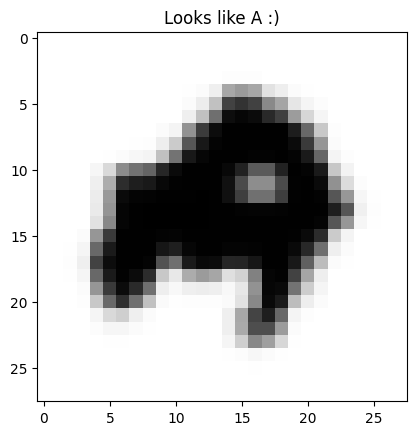

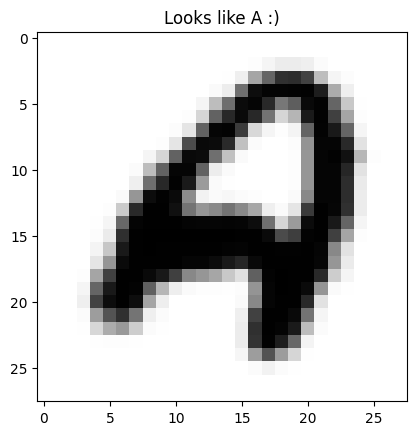

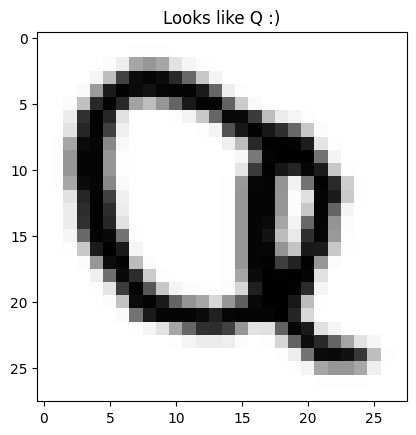

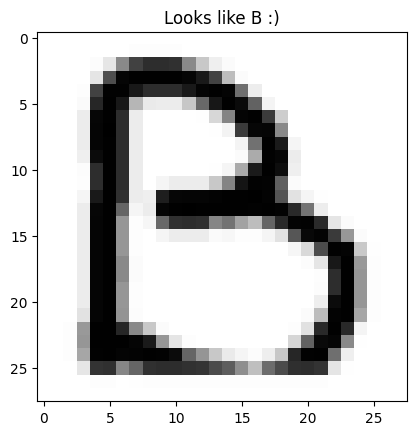

ValueError: invalid literal for int() with base 10: ''

In [50]:
# Show results
while True:
    index = int(input("Enter a number (0 - 14798): "))
    img = test_images[index]
    plt.imshow(np.fliplr(rotate(img.reshape(28, 28),-90)), cmap="Greys")
    
    img = img.reshape(-1,1)
    # Forward propagation
    h1_pre = b_i_h1 + w_i_h1.dot(img)
    h1 = np.log(1 + np.exp(h1_pre))  # Softplus activation
    
    h2_pre = b_h1_h2 + w_h1_h2.dot(h1)
    h2 = np.log(1 + np.exp(h2_pre))  # Softplus activation
    
    h3_pre = b_h2_h3 + w_h2_h3.dot(h2)
    h3 = np.log(1 + np.exp(h3_pre))  # Softplus activation
    
    o_pre = b_h3_o + w_h3_o.dot(h3)
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"Looks like {letter_dict[o.argmax()]} :)")
    plt.show()
